# Sentiment Analysis of E-Commerce Product / Hotel Reviews

We will use this publicly available dataset from Kaggle with 568,454 records:

[Amazon Fine Food Reviews on Kaggle](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/data)

Reviews from Oct 1999 – Oct 2012:
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with more than 50 reviews

views


In [2]:
import pandas as pd

### Loading Amazon Fine Food Reviews dataset. It has 568454 rows and 10 columns

In [4]:
df= pd.read_csv("Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

# Cleaning source

In [7]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
df.dropna(subset=["Summary"], inplace=True)
df.dropna(subset=["ProfileName"], inplace=True)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568401 non-null  int64 
 1   ProductId               568401 non-null  object
 2   UserId                  568401 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568401 non-null  int64 
 5   HelpfulnessDenominator  568401 non-null  int64 
 6   Score                   568401 non-null  int64 
 7   Time                    568401 non-null  int64 
 8   Summary                 568401 non-null  object
 9   Text                    568401 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
duplicates = df.duplicated()
print(duplicates.sum())
duplicates

0


0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568401, dtype: bool

In [11]:
print(df.isnull().sum())
df[df.isnull().any(axis=1)]

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [12]:
invalid_score = df[(df["Score"] < 1) | (df["Score"] > 5)]
print(invalid_score)

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


Check Time is from Oct 1999 - Oct 2012:
- October 1, 1999 at 00:00:00 UTC → 938736000
- November 1, 2012 at 00:00:00 UTC → 1351728000

In [14]:
invalid_date = df[(df["Time"] < 938736000) | (df["Time"] > 1351728000)]
print(invalid_date)

Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


In [19]:
df["Text"] = df["Text"].str.lower().str.replace(r'[^a-z\s]', '', regex=True)
df["Summary"] = df["Summary"].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

### Randomly selecting 50000 reviews from Amazon Fine Food Reviews dataset(df)

In [26]:
from sklearn.model_selection import train_test_split

df['Sentiment_label'] = df['Score'].apply(lambda x: 'positive' if x >= 4 else 'negative')

test_size = 0.2  # 20% test split
train_size = 0.8  # 80% train split

# Split the test set first
train_df, test_df = train_test_split(df, test_size=test_size, stratify=df["Score"], random_state=42)
test_df=test_df.sample(n=12500, random_state=42)
train_oversampled_df = pd.concat([train_df[train_df["Sentiment_label"]=='positive'].sample(n=25000, random_state=42), train_df[train_df["Sentiment_label"]=='negative'].sample(n=25000, random_state= 42)], ignore_index=True)
#train_oversampled_df.to_csv("amazon_reviews_oversample_minority_25k.csv", index= False)


# Preprocessing

Check for missing, duplicate, and formatting issues.

# Naive Bayes Classifier

In [30]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize


In [32]:
train_oversampled_df["Score"].mean()
#sampled_df["Score"].median()

3.37102

In [34]:
print(len(train_oversampled_df))
print(len(test_df))
print(len(train_oversampled_df[train_oversampled_df['Sentiment_label']=='positive']))
print(len(train_oversampled_df[train_oversampled_df['Sentiment_label']=='negative']))


50000
12500
25000
25000


In [36]:
# Create document lists as (review_text, label) pairs
train_docs = list(zip(train_oversampled_df['Summary'] + " " + train_oversampled_df['Text'], train_oversampled_df['Sentiment_label']))
test_docs = list(zip(test_df['Summary'] + " " + test_df['Text'], test_df['Sentiment_label']))

# Initialize the SentimentAnalyzer
sentim_analyzer = SentimentAnalyzer()

In [38]:
# Build a list of all words from the training data
all_words = []
for review, _ in train_docs:
    tokens = word_tokenize(review)
    all_words.extend(tokens)

# Create unigram features with a minimum frequency threshold
unigram_feats = sentim_analyzer.unigram_word_feats(all_words, min_freq=5) # testing

# Add the unigram feature extractor to the analyzer using NLTK's utility function
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)


In [40]:
# Convert the raw documents into feature sets
training_set = sentim_analyzer.apply_features(train_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [40]:
# Train the Naive Bayes Classifier using the training feature set
classifier = NaiveBayesClassifier.train(training_set)

# Evaluate the classifier on the test set
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

# Display the 10 most informative features
classifier.show_most_informative_features(10)

Accuracy: 0.51216
Most Informative Features
             contains(w) = False          positi : negati =      2.2 : 1.0
             contains(n) = False          positi : negati =      2.1 : 1.0
             contains(b) = False          positi : negati =      2.0 : 1.0
             contains(u) = False          positi : negati =      2.0 : 1.0
             contains(h) = False          positi : negati =      1.8 : 1.0
             contains(d) = False          positi : negati =      1.8 : 1.0
             contains(r) = False          negati : positi =      1.6 : 1.0
             contains(p) = False          positi : negati =      1.5 : 1.0
             contains(v) = False          negati : positi =      1.4 : 1.0
             contains(c) = False          positi : negati =      1.3 : 1.0


In [41]:
from sklearn.metrics import classification_report

# Get predicted labels
true_labels = [label for (_, label) in test_docs]  # Actual labels
predicted_labels = [classifier.classify(feats) for (feats, label) in test_set]  # Predicted labels

# Compute precision, recall, f1-score, and support
print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

    negative       0.24      0.61      0.35      2668
    positive       0.82      0.49      0.61      9832

    accuracy                           0.51     12500
   macro avg       0.53      0.55      0.48     12500
weighted avg       0.70      0.51      0.55     12500



# Run 1 with 50k equal weight
train_df, test_df = train_test_split(df, test_size=test_size, stratify=df["Score"], random_state=42)
test_df=test_df.sample(n=12500, random_state=42)
train_oversampled_df = pd.concat([train_df[train_df["label"]=='positive'].sample(n=25000, random_state=42), train_df[train_df["label"]=='negative'].sample(n=25000, random_state= 42)], ignore_index=True)

Result
Accuracy: 0.51216
              precision    recall  f1-score   support

    negative       0.24      0.61      0.35      2668
    positive       0.82      0.49      0.61      9832

    accuracy                           0.51     12500
   macro avg       0.53      0.55      0.48     12500
weighted avg       0.70      0.51      0.55     12500


The NaiveBayesClassifier in NLTK and the MultinomialNB model in scikit-learn are both Naïve Bayes classifiers, but we found out that the two have different algorithms:
https://stackoverflow.com/questions/10407266/scikits-learn-and-nltk-naive-bayes-classifier-performance-highly-different
1. Core Algorithm
- NLTK’s NaiveBayesClassifier: Uses a simple frequency-based approach, where it counts occurrences of features (words) in training data and calculates conditional probabilities using Laplace smoothing.
- scikit-learn’s MultinomialNB: Uses a multinomial distribution model, where it assumes that features (e.g., word counts in text classification) follow a multinomial distribution. This is more suited for discrete feature counts, like term frequency in NLP.
2. Feature Representation
- NLTK’s NaiveBayesClassifier: Works with feature dictionaries, meaning you have to represent input data as a dictionary of features ({'word1': True, 'word2': False, ...}).
- scikit-learn’s MultinomialNB: Works with numerical arrays, usually TF or TF-IDF values, meaning data needs to be vectorized using CountVectorizer or TfidfVectorizer.
3. Implementation & Flexibility
* NLTK’s NaiveBayesClassifier:
    - Simpler and more intuitive for teaching and small NLP projects.
    - Supports categorical feature values (like True/False instead of counts).
    - More transparent; you can inspect probabilities for each feature.
* scikit-learn’s MultinomialNB:
    - More efficient and optimized for large datasets.
    - Works well with sparse matrices (e.g., term frequency vectors).
    - Supports smoothing parameter alpha to handle zero-frequency issues.
4. Performance & Use Cases
* NLTK’s NaiveBayesClassifier:
    - Best for small, educational, or prototype projects.
    - Easier to inspect and explain results.
* scikit-learn’s MultinomialNB:
    - More suitable for large-scale NLP tasks like spam filtering, sentiment analysis, or document classification.
    - Faster due to its optimized implementation using NumPy.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [44]:
## Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jensen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/jensen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
# Now split out the text and sentiment labels for the test set
X_train_text = train_oversampled_df['Summary'] + " " + train_oversampled_df['Text']
X_test_text = test_df['Summary'] + " " + test_df['Text']
y_train = train_oversampled_df['Sentiment_label']
y_test = test_df['Sentiment_label']


# Then, transform the text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Train Naïve Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [48]:
import numpy as np
import pandas as pd

# Make predictions
y_pred = nb_model.predict(X_test)


# Find misclassified indices
misclassified_indices = np.where(y_pred != y_test)[0]

# Create a DataFrame of misclassified reviews
misclassified_reviews = pd.DataFrame({
    "Review": X_test_text.iloc[misclassified_indices],
    "Actual": y_test.iloc[misclassified_indices],
    "Predicted": y_pred[misclassified_indices]
})

print(misclassified_reviews.head(10))

                                                   Review    Actual Predicted
438515  try these tweaks for a tasty meal didnt expect...  positive  negative
463513  better than slim jim this is much better than ...  positive  negative
485790  addictive ive never been a big fan on chips wh...  positive  negative
311490  surprisingly all  of my dogs liked these i say...  positive  negative
320292  expiration date is good i was worried about th...  positive  negative
268590  mango is really mangoe if you dont like mangos...  positive  negative
254530  do donckels definitely i received donckels for...  positive  negative
42276   it is really that easy  minutes simmering and ...  positive  negative
114138  newton  graham cracker  win newtons fruit thin...  positive  negative
55978   seeds of change quinoa delivers a keen wow i h...  positive  negative


In [50]:
# Model Evaluation
# accuracy measures the overall correctness of the model(correct_pred / total_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Classification report
#Precision:How many of the predicted positives were actually positive? (Lower False Positives)
#Recall :How many of the actual positives were correctly identified? (Lower False Negatives)
#F1score: The harmonic mean of precision & recall (a balance between the two)
#Support:The number of actual samples in that class

print('Classification report:\n',classification_report(y_test, y_pred))

Accuracy: 0.8669
Classification report:
               precision    recall  f1-score   support

    negative       0.64      0.88      0.74      2668
    positive       0.96      0.86      0.91      9832

    accuracy                           0.87     12500
   macro avg       0.80      0.87      0.82     12500
weighted avg       0.89      0.87      0.87     12500



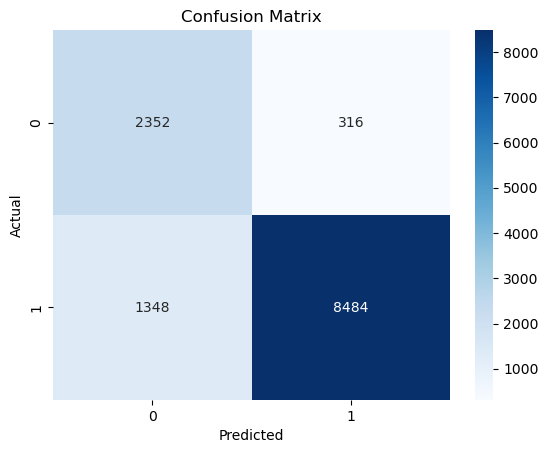

In [52]:
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()